<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab12_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Dimensionality Reduction with PCA
## Scott Spurlock
### 3-29-2021

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.datasets import make_classification

In [ ]:
fn = 'https://drive.google.com/uc?export=download&id=1vqMBid4r0C8apwYcpBQfVQ_TwEUNWY8r'
df = pd.read_csv(fn)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,2.536741,-3.301172,-0.401756,-1.202885,1.634385,0.328210,0.509842,0.307943,-1.330579,0.690989,2.056854,4.245124,-1.122276,-1.286053,0.570713,0.332914,0.065116,1.965521,-2.677922,0.145463,-0.765567,-0.108297,1.063411,-0.438486,-1.151013,1.475069,0.997267,2.782064,1.896763,-0.039366,0.0
1,2.700367,-2.672759,-0.683936,-2.410570,1.046541,0.066310,-0.602418,1.015624,-2.061458,0.174439,1.189218,3.816560,-0.600531,1.093787,0.323073,0.176187,1.493695,2.650732,-3.260990,0.149962,-0.141244,0.271675,2.083393,0.119871,0.704316,1.143842,-1.723951,2.419307,1.033950,-0.033414,0.0
2,-1.020962,-0.851870,1.270827,-0.921015,-1.205010,-0.552378,0.009268,0.409418,0.627190,-0.683375,0.076625,-1.163256,0.459435,-0.642715,0.376824,0.466007,-0.018943,-0.668694,-0.867758,-1.384927,0.455188,-2.445057,-0.628649,-0.592058,0.149045,1.808181,0.636952,1.196119,1.751840,1.279966,1.0
3,-1.450912,-1.156441,-2.247361,1.744520,-1.183791,-1.837285,3.915360,0.129572,1.739377,1.295061,5.047583,2.291222,3.047817,2.329900,-1.681013,2.591229,-0.429771,0.237015,0.372583,-0.389226,0.087047,-0.059553,-2.438575,-1.691106,-0.258106,-0.306145,-0.884099,1.796661,0.033870,0.763104,0.0
4,2.239896,2.216549,-2.511707,0.581304,1.978495,0.272168,-1.235817,-0.958662,-2.358019,1.147567,-1.565297,1.967257,-0.618975,0.037661,-1.619541,-1.517656,-0.840908,1.651650,1.042925,2.301618,0.242111,-0.232808,2.306771,2.040415,-0.339121,-0.049949,0.015628,-2.624473,-4.741839,-0.050563,0.0


In [ ]:
X = df.drop('30', axis=1)
y = df['30']
print(X.shape, y.shape)

(1000, 30) (1000,)


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)

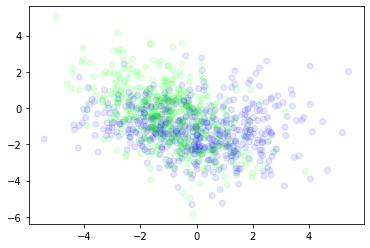

In [ ]:
plt.scatter(X['0'], X['1'], c=y, alpha=0.1, cmap='brg');

In [ ]:
# define transform
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(Xtrain)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# apply transform to dataset
Xtrain2 = pca.transform(Xtrain)
Xtrain2.shape

(500, 2)

In [ ]:
pca.components_

array([[ 2.18230906e-01,  1.20344101e-02,  8.12963510e-02,
         8.71722333e-04, -3.30512738e-02,  4.72078050e-03,
        -4.61732366e-01, -4.13112118e-03, -3.31238065e-01,
        -1.78359761e-01, -3.88279680e-01, -4.47303558e-02,
        -8.42797200e-02, -5.28338801e-03,  5.95388632e-02,
        -1.54678300e-01, -5.24486014e-03,  2.28920681e-01,
        -3.37494716e-01, -2.80266960e-02,  1.36199206e-01,
        -4.60060205e-04,  4.18942183e-01,  1.92397551e-01,
        -9.27033509e-03, -4.29447308e-03, -7.45248055e-03,
         3.72423496e-03, -6.27790858e-02, -9.10396709e-03],
       [-1.76219883e-01,  3.58174986e-01, -6.32009168e-02,
        -3.51859876e-04, -6.69813241e-02, -5.10878060e-03,
        -2.32899668e-02,  1.46781326e-02, -2.86222578e-02,
         9.75294491e-02, -2.65578525e-01, -2.36403806e-01,
         1.17429640e-01, -4.45145682e-03, -3.40784103e-01,
        -1.35707765e-01, -7.03739925e-03, -1.98749145e-01,
         2.83530485e-01, -4.41811827e-02,  2.28920921e-

In [ ]:
pca.explained_variance_

array([26.35664214, 14.39167091])

In [ ]:
pca.explained_variance_ratio_

array([0.35609967, 0.19444318])

In [ ]:
Xtrain2.shape

(500, 2)

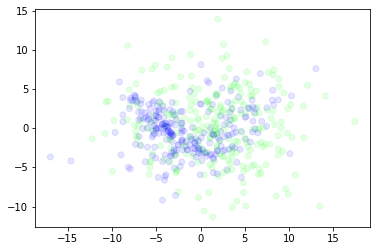

In [ ]:
plt.scatter(Xtrain2[:, 0], Xtrain2[:, 1], c=ytrain, alpha=0.1, cmap='brg');

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)


0.94

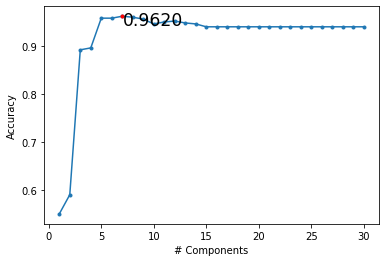

In [ ]:
components = []
acc = []

for i in range(1, 31):
  # define transform
  pca = PCA(n_components=i)
  # prepare transform on dataset
  pca.fit(Xtrain)
  # apply transform to dataset
  Xtrain2 = pca.transform(Xtrain)
  Xtest2 = pca.transform(Xtest)

  model.fit(Xtrain2, ytrain)
  ypred = model.predict(Xtest2)

  acc.append(accuracy_score(ytest, ypred))
  components.append(i)

max_idx = np.argmax(acc)

plt.plot(components, acc, '.-')
plt.plot(components[max_idx], acc[max_idx], '.r')
plt.text(components[max_idx]*1.01, acc[max_idx]*0.98, '{:.4f}'.format(acc[max_idx]), size='xx-large')
plt.xlabel('# Components')
plt.ylabel('Accuracy')
plt.show()

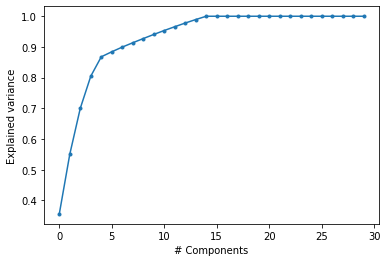

In [ ]:
cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs, '.-')
plt.xlabel('# Components')
plt.ylabel('Explained variance');

## Challenge: try isomap

In [ ]:
from sklearn.manifold import Isomap


isomap = Isomap(n_components=2)
isomap.fit(Xtrain)

Xtrain2 = isomap.transform(Xtrain)
Xtest2 = isomap.transform(Xtest)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain2, ytrain)
ypred = model.predict(Xtest2)

accuracy_score(ytest, ypred)

0.862

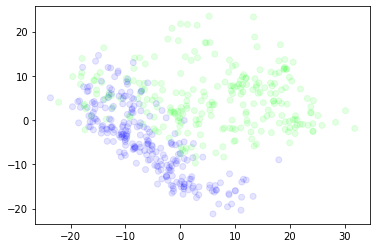

In [ ]:
plt.scatter(Xtrain2[:, 0], Xtrain2[:, 1], c=ytrain, alpha=0.1, cmap='brg');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


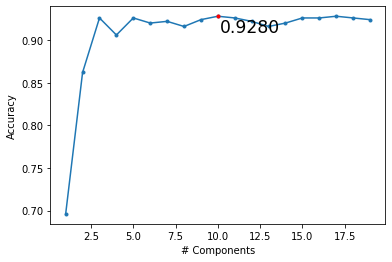

In [ ]:
components = []
acc = []

for i in range(1, 20):
  # define transform
  isomap = Isomap(n_components=i)
  # prepare transform on dataset
  isomap.fit(Xtrain)
  # apply transform to dataset
  Xtrain2 = isomap.transform(Xtrain)
  Xtest2 = isomap.transform(Xtest)

  model.fit(Xtrain2, ytrain)
  ypred = model.predict(Xtest2)

  acc.append(accuracy_score(ytest, ypred))
  components.append(i)

max_idx = np.argmax(acc)

plt.plot(components, acc, '.-')
plt.plot(components[max_idx], acc[max_idx], '.r')
plt.text(components[max_idx]*1.01, acc[max_idx]*0.98, '{:.4f}'.format(acc[max_idx]), size='xx-large')
plt.xlabel('# Components')
plt.ylabel('Accuracy')
plt.show()